In [5]:
import numpy as np 

In [6]:
X = np.array([0.5, 2.5]) 
Y = np.array([0.2, 0.9]) 

In [7]:
def sigmoid(x, w, b): 
  y_in = np.dot(x, w) + b 
  y_hat = 1/(1 + np.exp(-y_in)) 
  return y_hat 

In [8]:
def error(y, y_hat):
  mse = np.array((y-y_hat)**2).mean() 
  return mse 

In [9]:
from sklearn.preprocessing import normalize 
def accuracy(y, y_hat): 
  acc = np.array((y_hat/y)*100) 
  acc = normalize([acc]) 
  return acc.mean()*100 

Stochastic Gradient Descent

In [41]:
def stochastic_gd(X, Y, epochs):
  w = -2 
  c = 1 
  b = -2 
  err_list = [] 
  acc_list = [] 
  W = [] 
  B = [] 
  for i in range(epochs): 
    for x, y in zip(X, Y):
      y_hat = sigmoid(x, w, b) 
      w -= c*(y_hat-y)*y_hat*(1-y_hat)*x 
      b -= c*(y_hat-y)*y_hat*(1-y_hat) 
    W.append(w) 
    B.append(b) 
    err_list.append(error(Y, sigmoid(X, w, b)))
    acc_list.append(accuracy(Y, sigmoid(X, w, b)))
    print(f"After epoch {i+1}: Weight ==> {w} and Bias ==> {b}") 
  return W, B, err_list, acc_list

In [42]:
wt, bias, err, acc = stochastic_gd(X, Y, 100)

After epoch 1: Weight ==> -1.994475795729677 and Bias ==> -1.9922760867629123
After epoch 2: Weight ==> -1.988884289816156 and Bias ==> -1.984490060103158
After epoch 3: Weight ==> -1.9832238302034213 and Bias ==> -1.9766409916688152
After epoch 4: Weight ==> -1.9774927017445665 and Bias ==> -1.9687279315547233
After epoch 5: Weight ==> -1.9716891228731768 and Bias ==> -1.9607499074958448
After epoch 6: Weight ==> -1.9658112420494782 and Bias ==> -1.9527059240114042
After epoch 7: Weight ==> -1.959857133962649 and Bias ==> -1.9445949614955387
After epoch 8: Weight ==> -1.9538247954688788 and Bias ==> -1.9364159752497354
After epoch 9: Weight ==> -1.947712141242738 and Bias ==> -1.928167894451829
After epoch 10: Weight ==> -1.9415169991171701 and Bias ==> -1.9198496210557554
After epoch 11: Weight ==> -1.9352371050849135 and Bias ==> -1.9114600286156187
After epoch 12: Weight ==> -1.9288700979313518 and Bias ==> -1.9029979610269032
After epoch 13: Weight ==> -1.922413513465651 and Bias 

In [43]:
epoch = [i for i in range(1, 101)] 

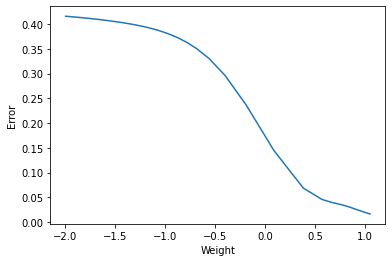

In [44]:
import matplotlib.pyplot as plt 
plt.plot(wt, err)
plt.xlabel("Weight") 
plt.ylabel("Error")
plt.show()

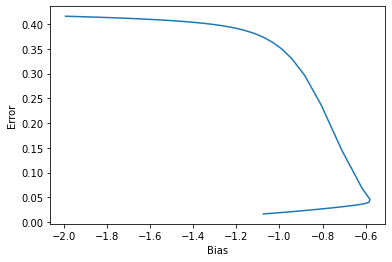

In [45]:
import matplotlib.pyplot as plt 
plt.plot(bias, err)
plt.xlabel("Bias") 
plt.ylabel("Error")
plt.show()

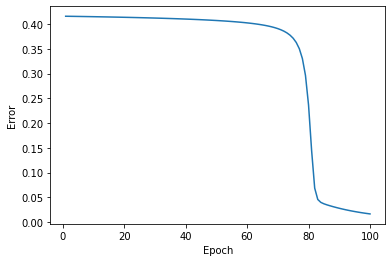

In [46]:
import matplotlib.pyplot as plt 
plt.plot(epoch, err)
plt.xlabel("Epoch") 
plt.ylabel("Error")
plt.show()

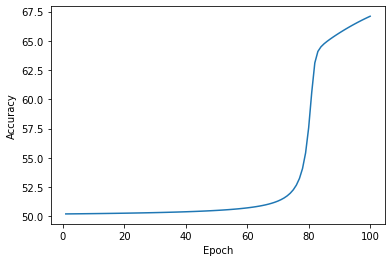

In [47]:
import matplotlib.pyplot as plt 
plt.plot(epoch, acc)
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.show()

Batch Gradient Descent

In [35]:
def batch_gd(X, Y, epochs): 
  w = -2 
  c = 1 
  b = -2 
  err_list_batch = [] 
  acc_list_batch = [] 
  W = []
  B = [] 
  for i in range(epochs): 
    temp_w = 0 
    temp_b = 0 
    for x, y in zip(X, Y): 
      y_hat = sigmoid(x, w, b)
      temp_w += c*(y_hat-y)*y_hat*(1-y_hat)*x 
      temp_b += c*(y_hat-y)*y_hat*(1-y_hat) 
    temp_w = temp_w/len(Y) 
    temp_b = temp_b/len(Y) 
    w -= temp_w
    b -= temp_b
    W.append(w) 
    B.append(b) 
    err_list_batch.append(error(Y, sigmoid(X, w, b))) 
    acc_list_batch.append(accuracy(Y, sigmoid(X, w, b)))
    print(f"After epoch {i+1}: Weight ==> {w} and Bias ==> {b}") 
  return W, B, err_list_batch, acc_list_batch

In [36]:
wt2, bias2, err_batch, acc_batch = batch_gd(X, Y, 100)

After epoch 1: Weight ==> -1.99725384039218 and Bias ==> -1.9961444203923928
After epoch 2: Weight ==> -1.9944912004709476 and Bias ==> -1.9922734714647627
After epoch 3: Weight ==> -1.9917118825485347 and Bias ==> -1.9883870406790147
After epoch 4: Weight ==> -1.9889156852695724 and Bias ==> -1.984485014240972
After epoch 5: Weight ==> -1.9861024035175066 and Bias ==> -1.9805672770781728
After epoch 6: Weight ==> -1.9832718283179627 and Bias ==> -1.9766337128170246
After epoch 7: Weight ==> -1.9804237467389414 and Bias ==> -1.9726842037592907
After epoch 8: Weight ==> -1.9775579417877174 and Bias ==> -1.9687186308578795
After epoch 9: Weight ==> -1.9746741923043087 and Bias ==> -1.9647368736919084
After epoch 10: Weight ==> -1.9717722728513796 and Bias ==> -1.9607388104410104
After epoch 11: Weight ==> -1.9688519536004305 and Bias ==> -1.9567243178588505
After epoch 12: Weight ==> -1.9659130002141245 and Bias ==> -1.9526932712458187
After epoch 13: Weight ==> -1.9629551737245892 and B

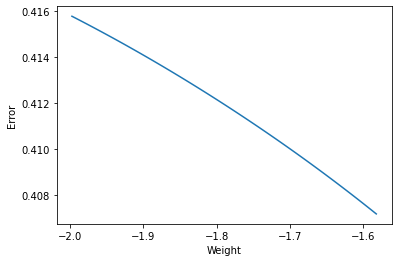

In [37]:
plt.plot(wt2, err_batch) 
plt.xlabel("Weight") 
plt.ylabel("Error")
plt.show()

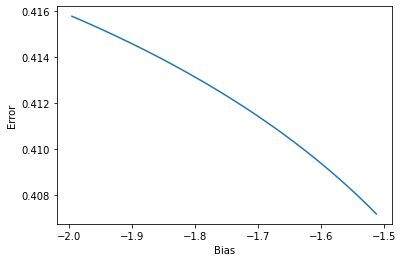

In [38]:
plt.plot(bias2, err_batch) 
plt.xlabel("Bias") 
plt.ylabel("Error")
plt.show()

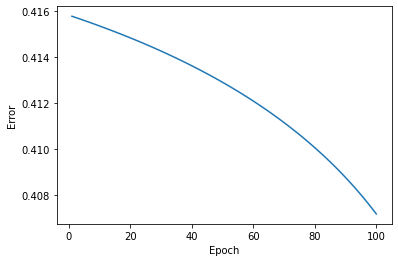

In [39]:
plt.plot(epoch, err_batch) 
plt.xlabel("Epoch") 
plt.ylabel("Error")
plt.show()

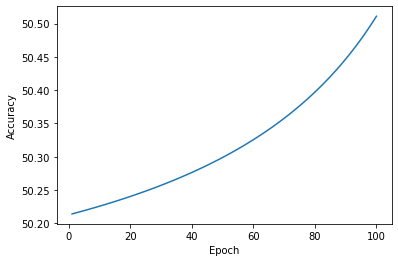

In [40]:
plt.plot(epoch, acc_batch) 
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.show()